<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2024/blob/main/Alzheimers/classification_of_alzheimers_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import math
import numpy as np
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [ ]:
# !apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
# !apt install cm-super

In [ ]:
# plt.rcParams['text.usetex'] = True

**Reading the data**

In [ ]:
# Importing the datasets
df     = pd.read_csv('alzheimers_disease_data.csv')

**Display the data**

In [ ]:
df.shape

**Display sample data**

In [ ]:
df.head()

In [ ]:
df.sample(n = 10)

In [ ]:
# Drop the DoctorInCharge column
# df.drop(columns='DoctorInCharge', inplace=True)

In [ ]:
# Drop rows with any NaN values
df = df.dropna()

In [ ]:
df.sample(n = 10)

In [ ]:
ones_count = df['Diagnosis'].value_counts()[1]
print(ones_count)

In [ ]:
zeros_count = (df['Diagnosis'] == 0).sum()
print(zeros_count)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with size 4x3 inches, 80 DPI resolution
fig = plt.figure(figsize=(4, 3), dpi=80)

# Use 'Diagnosis' as both x and hue to apply palette safely
sns.countplot(data=df, x='Diagnosis', hue='Diagnosis', palette='Set2', legend=False)

plt.tight_layout()
plt.savefig('classes.png')
plt.show()

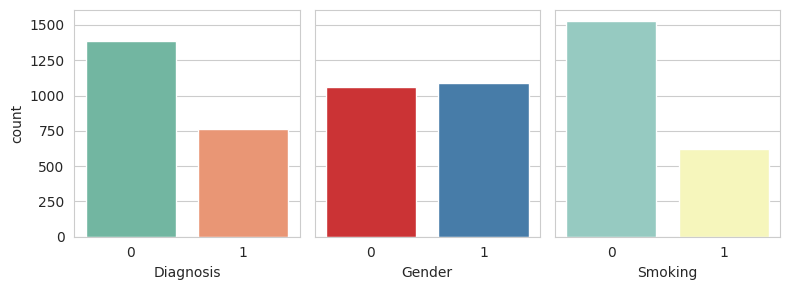

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

sns.countplot(ax=axes[0], data=df, x='Diagnosis', hue='Diagnosis', palette='Set2', legend=False)
sns.countplot(ax=axes[1], data=df, x='Gender', hue='Gender', palette='Set1', legend=False)
sns.countplot(ax=axes[2], data=df, x='Smoking', hue='Smoking', palette='Set3', legend=False)

plt.tight_layout()
plt.savefig('Statistics.png')
plt.show()



```
# This is formatted as code
```

**Correlation between different variables**

In [ ]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='Diagnosis', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['Diagnosis'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

In [ ]:
# # Set up the matplotlib plot configuration
# f, ax = plt.subplots(figsize=(18, 4))
# # Generate a mask for upper traingle
# mask = np.triu(np.ones_like(corr, dtype=bool))
# # Configure a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# # Draw the heatmap
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
# plt.savefig('Heatmap.png')

**Oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Assuming your DataFrame is called `df` and the target variable is called `Prediction`
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Instantiate a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Combine the resampled X and y into a new DataFrame
df = pd.concat([X_resampled, y_resampled], axis=1)


In [ ]:
df.shape

(2778, 34)

In [ ]:
# # example of random undersampling to balance the class distribution
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # The class can be used just like the RandomOverSampler class in the
# # previous section, except the strategies impact the majority class
# # instead of the minority class. For example, setting the sampling_strategy
# # argument to “majority” will oversample the majority class determined
# # by the class with the largest number of examples.

# # define Oversample strategy
# oversample = RandomOverSampler(sampling_strategy='not majority')
# x_over, y_over = oversample.fit_resample(x_data,y_data)

In [ ]:
# y_over.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# x_over.shape

In [ ]:
# X

**Preparing data for machine learning classifier**



In [ ]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature selection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

#======================================
# Apply feature selection using SelectKBest and F-test
# We apply feature selection using SelectKBest and F-test, which selects the top 5 features based on their importance.
#======================================
selector  = SelectKBest(f_classif, k=5)

x_train    = selector.fit_transform(x_train, y_train)
x_test     = selector.transform(x_test)

# y_train = Y_train
# y_test  = Y_test

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# 1. Apply feature selection on the training data
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# 2. Get mask of selected features
mask = selector.get_support()

# 3. Get selected feature names directly from X
selected_feature_names = X.columns[mask]

print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


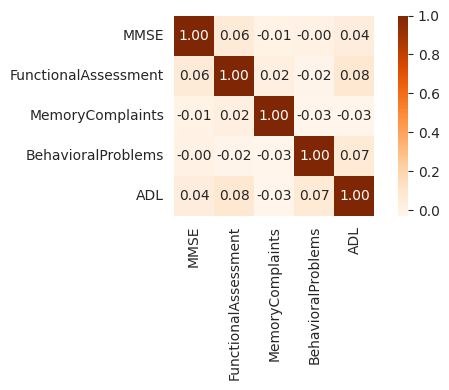

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the desired columns
cols = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']

# Compute the correlation matrix
corr_matrix = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", square=True)

# Save the figure
plt.tight_layout()
plt.savefig('Correlation with Diagnosis.png')
plt.show()

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate

def calculate_confusion(clf_name, y_train, y_pred_train, y_test, y_pred_test):

    # Calculate accuracy, precision, recall, and F1 score for training and testing sets
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    train_prec = precision_score(y_train, y_pred_train)
    test_prec = precision_score(y_test, y_pred_test)
    train_rec = recall_score(y_train, y_pred_train)
    test_rec = recall_score(y_test, y_pred_test)
    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    # Calculate the confusion matrix for training and testing sets
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    # Create a 1x2 figure with the confusion matrix on the left and evaluation metrics on the right
    fig, axs = plt.subplots(1, 2, figsize=(6,2),sharey=True)

    # Plot the confusion matrix for training set
    sns.heatmap(train_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[0], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[0].set_title('Training Set',fontsize=10)
    axs[0].set_xlabel('Predicted Labels',fontsize=10)
    axs[0].set_ylabel('True Labels',fontsize=10)

    # Plot the confusion matrix for testing set
    sns.heatmap(test_cm, annot=True, cmap='YlGnBu', fmt='g', ax=axs[1], annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
    axs[1].set_title('Testing Set',fontsize=10)
    axs[1].set_xlabel('Predicted Labels',fontsize=10)
    axs[1].set_ylabel('True Labels',fontsize=10)

    # Add a main title to the figure
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.01, fontname='Times')
    # fig.suptitle(f'Confusion matrix using {clf_name} ', fontsize=12, y=1.09)
    plt.savefig(clf_name + ".png")
    # Show the plot
    plt.show()

    # Define the performance metrics for training and testing cases
    train_metrics = ["Train Accuracy", "Train Precision", "Train Recall", "Train F1"]
    test_metrics = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1"]

    # Create a list of lists containing the metrics
    table = [train_metrics + test_metrics,
         [train_acc, train_prec, train_rec, train_f1, test_acc, test_prec, test_rec, test_f1]]

    # Print the table
    print('-----Results for',clf_name,'----------------------')
    print(tabulate(table, headers='firstrow'))

# Logistic Regression

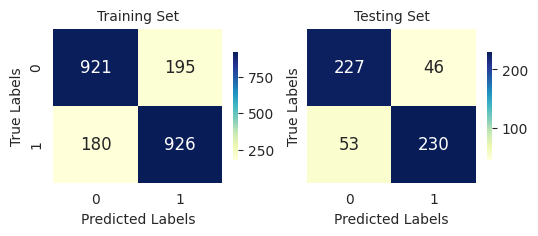

-----Results for LR ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.831233           0.826048        0.837251    0.831612         0.821942          0.833333       0.812721   0.822898


In [ ]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# We now prepare our selected models
models  = []
results = []
names   = []
scoring = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', max_iter=20)
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc1 = metrics.roc_auc_score(y_train,lr.predict(x_train))

# Support Vector Machine

In [ ]:
#SVM ####################################
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, probability=True)
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc2 = metrics.roc_auc_score(y_train,svm.predict(x_train))

# Gradient Boosting Classifier

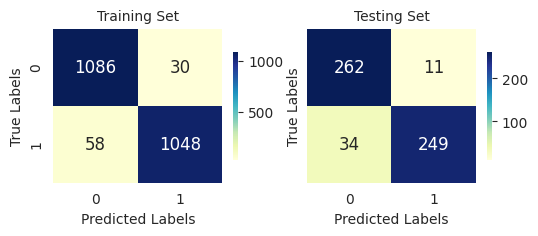

-----Results for GBC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.960396           0.972171        0.947559    0.959707         0.919065          0.957692       0.879859   0.917127


In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)

calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc3 = metrics.roc_auc_score(y_train,y_pred_train)

# GaussianNB

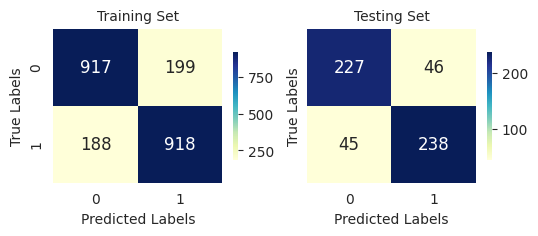

-----Results for GNB ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.825833           0.821844        0.830018    0.825911         0.836331          0.838028       0.840989   0.839506


In [ ]:
#GaussianNB
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB(priors=None, var_smoothing=1e-9)
GNB.fit(x_train, y_train)

# Adjust classification threshold to 0.3
y_pred_train = GNB.predict(x_train)
# y_pred_train = (y_pred_train >= 0.1).astype(int)

y_pred_test  = GNB.predict(x_test)
# y_pred_test = (y_pred_test >= 0.1).astype(int)

calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc4 = metrics.roc_auc_score(y_train,GNB.predict(x_train))

# KNeighborsClassifier

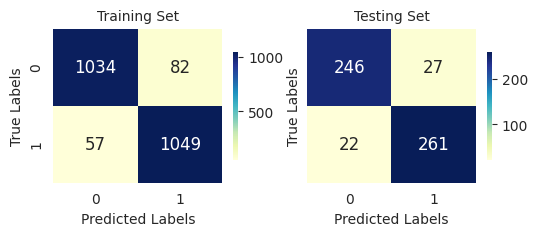

-----Results for KNC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.937444           0.927498        0.948463    0.937863         0.911871           0.90625       0.922261   0.914186


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_pred_train)
# Calculate Area under the curve to display on the plot
auc5 = metrics.roc_auc_score(y_train,KNC.predict(x_train))

# Decision Tree

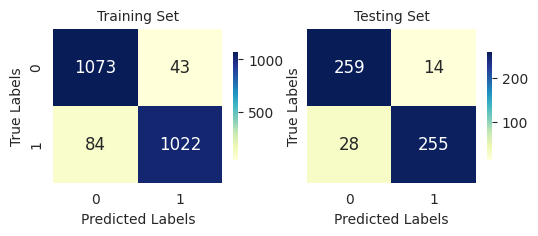

-----Results for DT ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.942844           0.959624        0.924051    0.941502          0.92446          0.947955        0.90106   0.923913


In [ ]:
# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, DT.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc6 = metrics.roc_auc_score(y_train,y_pred_train)

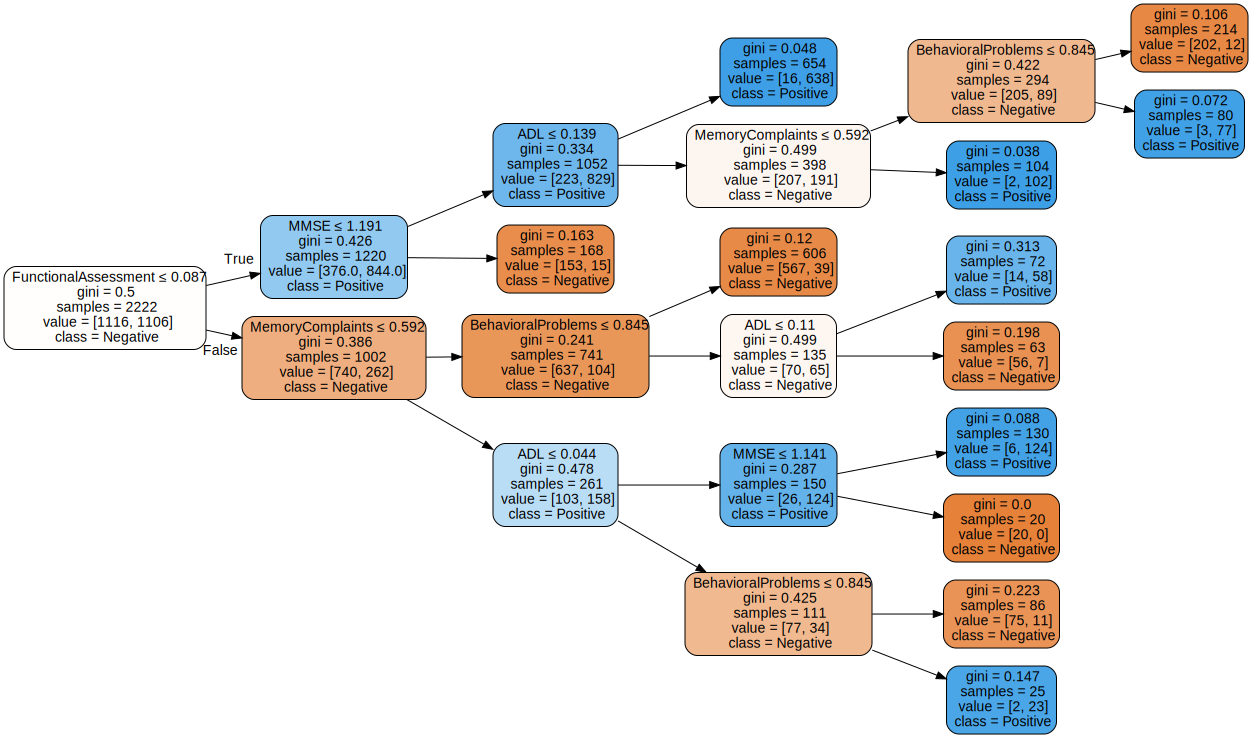

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Diagnosis'], axis=1),
                                                    df['Diagnosis'],
                                                    test_size=0.25,
                                                    random_state=42)

# Train the decision tree on the scaled data
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,ccp_alpha=0.01)
DT.fit(x_train, y_train)

# Export the tree as a Graphviz dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=selected_feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph


In [ ]:
# Plotting the Decision Tree diagram
# from sklearn.tree import plot_tree
# plt.figure(figsize=(4,4))
# plot_tree(DT, filled=True, feature_names=selected_feature_names, class_names='Diagnosis')
# plt.show()

# Random Forest Classifier

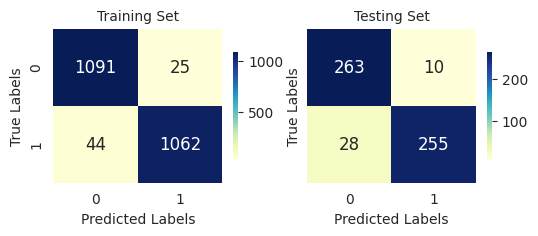

-----Results for RFC ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.968947           0.977001        0.960217    0.968536         0.931655          0.962264        0.90106   0.930657


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier with max_features set to 0.5
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini', max_features=1.0, random_state=42)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_train, RFC.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc7 = metrics.roc_auc_score(y_train,y_pred_train)

In [ ]:
# Create a Random Forest classifier object
RFC= RandomForestClassifier(n_estimators=10, ccp_alpha=0.01)

# Train the model on the data
RFC.fit(X, y)

# Print the trained decision trees
for i, tree in enumerate(RFC.estimators_):
    print(f"Tree {i}:")
    print(tree.tree_.max_depth)  # print the depth of each tree

Tree 0:
6
Tree 1:
4
Tree 2:
8
Tree 3:
9
Tree 4:
5
Tree 5:
6
Tree 6:
8
Tree 7:
5
Tree 8:
6
Tree 9:
4


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Assuming you have trained your RandomForestClassifier and named it RFC
# # Make sure to replace RFC with your actual RandomForestClassifier instance

# # Check if the RFC has been fitted and contains estimators
# if hasattr(RFC, 'estimators_') and len(RFC.estimators_) > 0:
#     # Choose the best tree from the forest based on mean decrease impurity
#     best_tree_index = RFC.feature_importances_.argmax()

#     # Verify that the best_tree_index is within valid range
#     if 0 <= best_tree_index < len(RFC.estimators_):
#         # Plot the best tree in the forest
#         fig, ax = plt.subplots(figsize=(10, 10))
#         plot_tree(RFC.estimators_[best_tree_index], ax=ax)
#         plt.show()
#     else:
#         print("Invalid best_tree_index.")
# else:
#     print("RandomForestClassifier not properly fitted.")


In [ ]:
print(selected_feature_names)

Index(['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


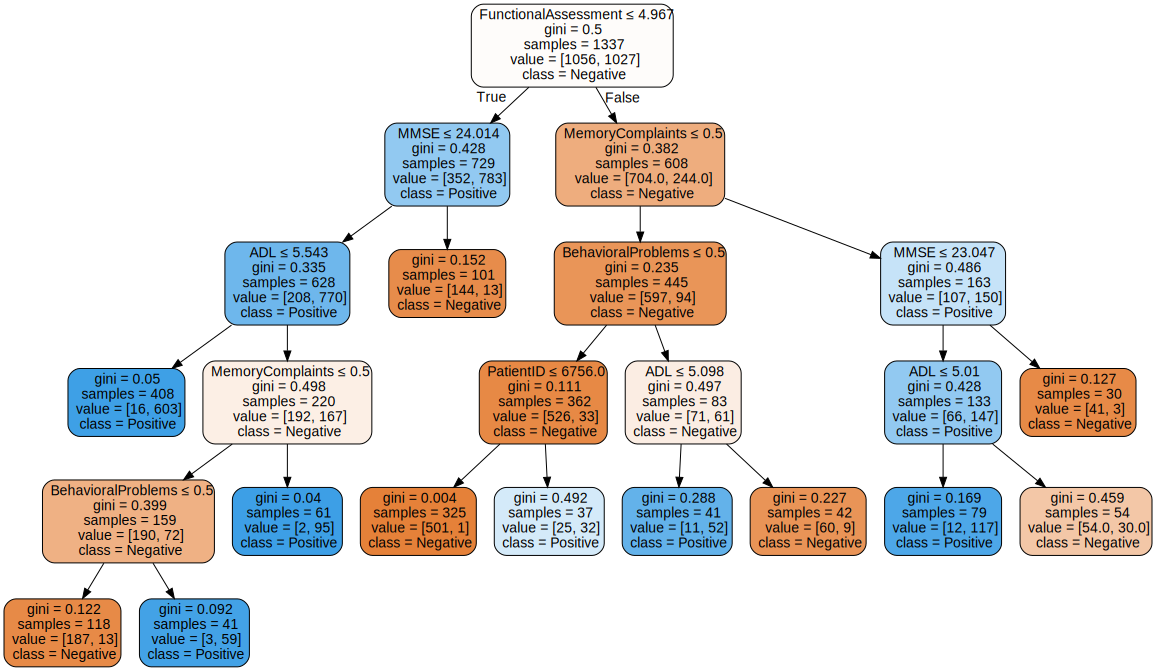

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd

# Assume df is your original DataFrame and 'Diagnosis' is the target
X = df.drop('Diagnosis', axis=1)
Y = df['Diagnosis']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Train the Random Forest model
RFC = RandomForestClassifier(n_estimators=100, max_depth=7, criterion='gini',
                             max_features=1.0, random_state=42, ccp_alpha=0.01)
RFC.fit(X_train, Y_train)

# Export the first decision tree from the Random Forest
dot_data = export_graphviz(RFC.estimators_[0],
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=['Negative', 'Positive'],
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Generate and render the graph
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('random_forest_tree', view=False)  # Saves as random_forest_tree.png

# Display the graph (inline in notebooks or GUIs that support it)
graph


# Artificial Neural Network

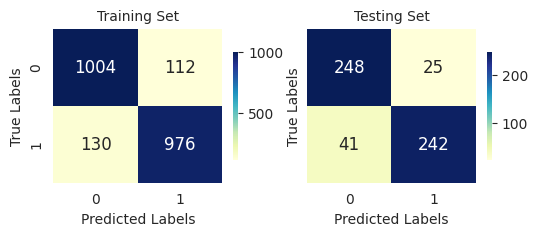

-----Results for ANN ----------------------
  Train Accuracy    Train Precision    Train Recall    Train F1    Test Accuracy    Test Precision    Test Recall    Test F1
----------------  -----------------  --------------  ----------  ---------------  ----------------  -------------  ---------
        0.891089           0.897059        0.882459    0.889699         0.881295          0.906367       0.855124       0.88


In [ ]:
#Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='adam', max_iter= 1000, alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_test, y_test)
results.append(cv_results)

In [ ]:
# Compute False postive rate, and True positive rate
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, ANN.predict_proba(x_train)[:,1])
# Calculate Area under the curve to display on the plot
auc8 = metrics.roc_auc_score(y_train,y_pred_train)

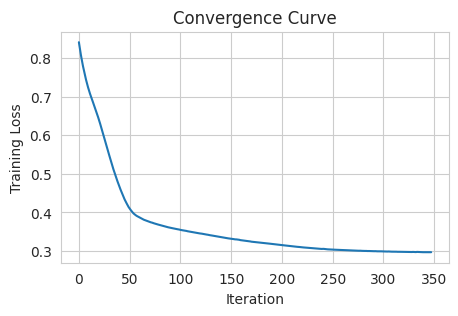

In [ ]:
# Get the training loss values at each iteration
loss_values = ANN.loss_curve_

fig = plt.figure(figsize=(5,3))
# Plot the convergence curve
plt.plot(loss_values)
plt.grid(True)
plt.title('Convergence Curve')
plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Training Loss', fontsize=10)
plt.savefig('ANN_convergence.png')
plt.show()

# Box Plot

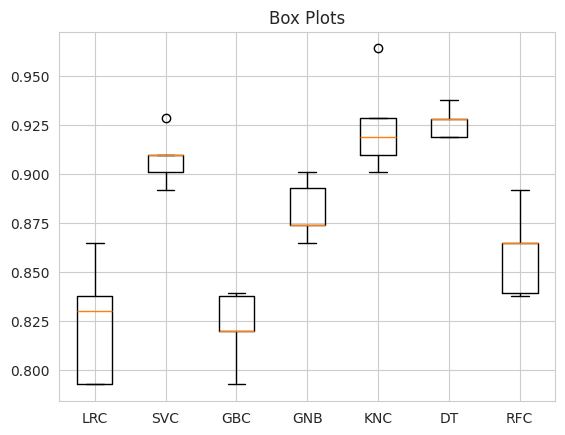

In [ ]:
names = ['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT', 'RFC']  # only 7

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1)

# Draw the box plots
ax.boxplot(results)

# Set the labels for each box plot
ax.set_xticklabels(names)

# Add a title to the plot
ax.set_title('Box Plots')

# Save the figure
plt.savefig('boxplots.png')

# Show the plot
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the FPR and TPR values for each algorithm as arrays
# np.array(['LRC', 'SVC', 'GBC', 'GNB', 'KNC', 'DT','RFC', 'ANN'])
# fpr = [fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7,fpr8]
# tpr = [tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7,tpr8]
# auc = [auc1,auc2,auc3,auc4,auc5,auc6,auc7,auc8]

# # Plot the ROC curve for each algorithm
# plt.figure(figsize=(8, 4))
# # Create plot
# for i in range(len(fpr)):
#     label_str = f"{names[i]} AUC = {auc[i]:.2f}"
#     plt.plot(fpr[i], tpr[i], label=label_str)

# # Set the axis labels and title
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('ROC Curve')

# # Set the axis limits
# plt.xlim([0, 1])
# plt.ylim([0, 1])

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
print(selected_feature_names)

Index(['MMSE', 'FunctionalAssessment', 'MemoryComplaints',
       'BehavioralProblems', 'ADL'],
      dtype='object')


# ROC Curves

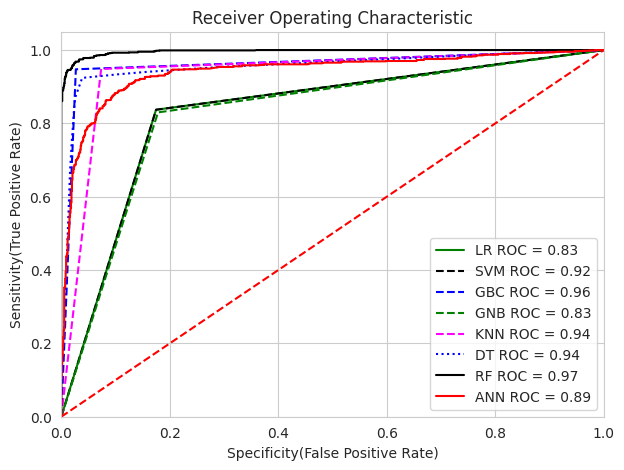

In [ ]:
# Now, plot the computed values
fig = plt.figure(figsize=(7,5))

plt.plot(fpr1, tpr1, linestyle='-',color='green', label='LR ROC = %.2f' %auc1)
plt.plot(fpr2, tpr2, linestyle='--',color='black', label='SVM ROC = %.2f' %auc2)
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='GBC ROC = %.2f' %auc3)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='GNB ROC = %.2f' %auc4)
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='KNN ROC = %.2f' %auc5)
plt.plot(fpr6, tpr6, linestyle=':',color='blue', label='DT ROC = %.2f' %auc6)
plt.plot(fpr7, tpr7, linestyle='-',color='black', label='RF ROC = %.2f' %auc7)
plt.plot(fpr8, tpr8,linestyle='-',color='red', label='ANN ROC = %.2f' %auc8)

# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Curves.png')
plt.show()   # Display